In [38]:
import numpy as np

In [39]:
from sklearn import datasets
import pandas as pd
import os

In [40]:
iris_df = load_iris(as_frame=True)

In [41]:
X = iris_df.data
y = iris_df.target

In [42]:
iris_df = pd.concat([X, y], axis=1)

In [44]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [23]:
iris_frame = pd.DataFrame(datasets.load_iris().data)
iris_target = pd.DataFrame(datasets.load_iris().target)

In [25]:
iris_df = pd.concat([iris_frame, iris_target], axis=1)

# CONCAT() ИСПОЛЬЗУЙ С AXIS=1 !!!


In [45]:
class Perceptron(object):
    """Классификатор на основе персептрона.
    Параметры
    ---------
    ete : float
      Скорость обучения (learning rate) (между 0.0 и 1.0)
    n_iter : int
      Проходы по обучающему набору дынных.
    random_state : int
      Начальное значение генератора случайных чисел
      для инициализации случайными весами.
    
    Атрибуты
    --------
    w_ : одномерный массив
      Веса после подгонки.
    errors_ : список
      Количество неправильных классификаций (обновлений) в каждой эпохе.
      
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    
#     w_ = []
    
    def fit(self, X, y):
        """Подгоняет к обучающим данным.
        Параметры
        ---------
        X : {подобен массиву}, форма = {n_examples, n_features}
          Обучающие векторы, где n_examples - количество образцов
          и n_features - количество признаков.
        y : подобен массиву, форма = {n_examples}
          Целевые значения.
        
        Возвращает
        ----------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    def net_input(self, X):
        """Вычисляет общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        """Возвращает метку класса после единичного шага"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [46]:
import matplotlib.pyplot as plt

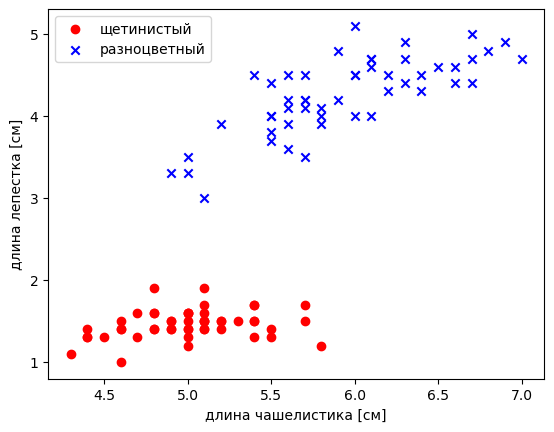

In [47]:
# выбрать ирис щетинистый и ирис разноцветный
y = iris_df.iloc[0:100, 4].values
y = [-1 if i == 0 else i for i in y]

# Извлечь длину чашелисTика и длину лeпестка
X = iris_df.iloc[0:100, [0,2]].values

# вычертить график для данных
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='щетинистый')

plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='разноцветный')

plt.xlabel('длина чашелистика [см]')
plt.ylabel('длина лепестка [см]')
plt.legend(loc='upper left')

plt.show()

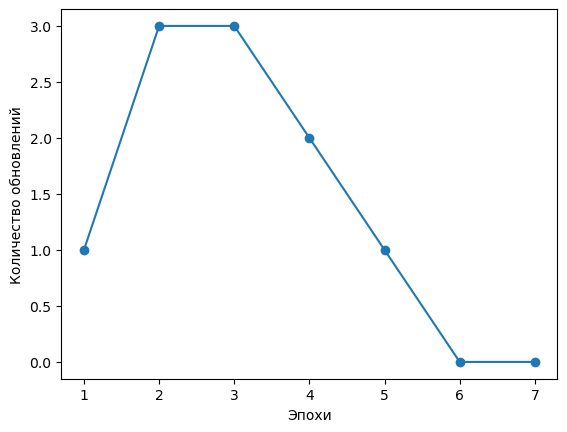

In [55]:
ppn = Perceptron(eta=0.1, n_iter=7)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')

plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')

plt.show()

In [56]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # настроить генератор маркеров и карту цветов
    markers = ('s', 'x', 'o', '4')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # вывести поверхность решения
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl,
                    edgecolor='black')
    

C:\Users\Я\AppData\Local\Temp\ipykernel_12792\185315020.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


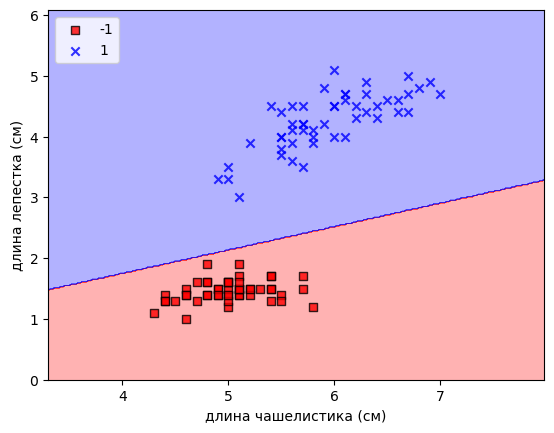

In [57]:
plot_decision_regions(X, y, ppn)
plt.xlabel('длина чашелистика (см)')
plt.ylabel('длина лепестка (см)')
plt.legend(loc='upper left')
plt.show()

In [58]:
import pandas as pd
card_fraud_df = pd.read_csv(r'C:\Users\Я\Desktop\читы жизнь\Study\Programming\0_Jupyter\creditcard.csv')

In [59]:
X.shape

(100, 2)

In [60]:
card_fraud_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [61]:
from sklearn.utils import shuffle

In [176]:
card_fraud_df = shuffle(card_fraud_df)
X_train = card_fraud_df.iloc[:200000, [11, 14]]
card_fraud_df = shuffle(card_fraud_df)
X_test = card_fraud_df.iloc[200000:, [11, 14]]
card_fraud_df = shuffle(card_fraud_df)
y_train = card_fraud_df.iloc[:200000, -1]
card_fraud_df = shuffle(card_fraud_df)
y_test = card_fraud_df.iloc[200000:, -1]

In [177]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200000, 2), (84807, 2), (200000,), (84807,))

In [178]:
y_train

79717     0
236055    0
77924     0
148005    0
268433    0
         ..
134650    0
214684    0
67082     0
170309    0
67807     0
Name: Class, Length: 200000, dtype: int64

In [179]:
y_train.shape

(200000,)

In [180]:
y_test = [-1 if i == 0 else 1 for i in y_test]
y_train = [-1 if i == 0 else 1 for i in y_train]

In [181]:
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

In [186]:
y_train.shape

(200000,)

In [187]:
y_test.value_counts()

-1    84674
 1      133
dtype: int64

In [188]:
y_train.value_counts()

-1    199648
 1       352
dtype: int64

In [189]:
ppn2 = Perceptron(n_iter = 17)
ppn2.fit(X_train.values.reshape(-1,2), y_train.values)

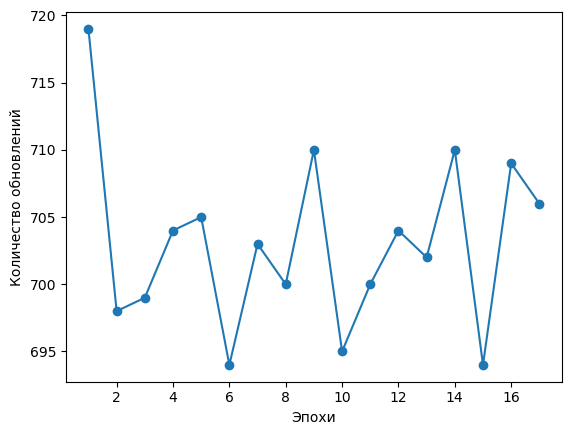

In [190]:
plt.plot(range(1, len(ppn2.errors_) + 1), ppn2.errors_, marker='o')

plt.xlabel('Эпохи')
plt.ylabel('Количество обновлений')

plt.show()

In [191]:
y_pred = ppn2.predict(X_test.values.reshape(-1,2))

In [192]:
y_pred.shape

(84807,)

In [193]:
y_test.values.reshape(-1,1).shape

(84807, 1)

In [203]:
pd.Series(y_pred - y_test).value_counts()

 0    84609
-2      133
 2       65
dtype: int64

C:\Users\Я\AppData\Local\Temp\ipykernel_12792\185315020.py:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


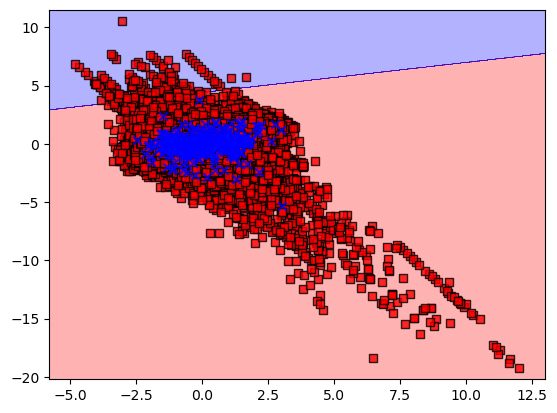

In [204]:
plot_decision_regions(X_train.values.reshape(-1,2), y_train.values, ppn2)